In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import box
import rasterio
from rasterio.warp import transform_geom, calculate_default_transform
from shapely.geometry import Point, Polygon
from ShallowLearn import LoadData
from ShallowLearn.Training import reshape_data
import matplotlib.pyplot as plt
from  ShallowLearn import Transform
from ShallowLearn import ImageHelper
from ShallowLearn.Widgets import BandPlotter
from ShallowLearn.Indices import ci, ndci, wqi, oci, wbei, bgr
from ShallowLearn.band_mapping import band_mapping

In [2]:
%matplotlib widget

In [3]:
import os
import glob

# specify the directory path
dir_path = '/media/ziad/Expansion/Cleaned_Data_Directory'

# search for all .tiff files in the directory
file_list = glob.glob(dir_path + '/*6880*.tiff')

# get the full directory paths for each file
dir_list = [os.path.join(dir_path, f) for f in file_list]

In [4]:
img_test = ImageHelper.load_img(dir_list[6])

In [5]:
tf_img = Transform.LCE_multi(img_test)

In [6]:
oci_data = np.expand_dims(oci(tf_img), axis = 2)

In [7]:
wqi_data = np.expand_dims(wqi(tf_img), axis = 2)

In [8]:
bgr_data = np.expand_dims(bgr(tf_img), axis = 2)

In [9]:
input_arr = np.array([wqi_data, oci_data, bgr_data])

In [10]:
output_array = np.transpose(input_arr, (1, 2, 0, 3))
output_array = np.reshape(output_array, (725, 534, 3))

IntSlider(value=0, description='Band', max=2)

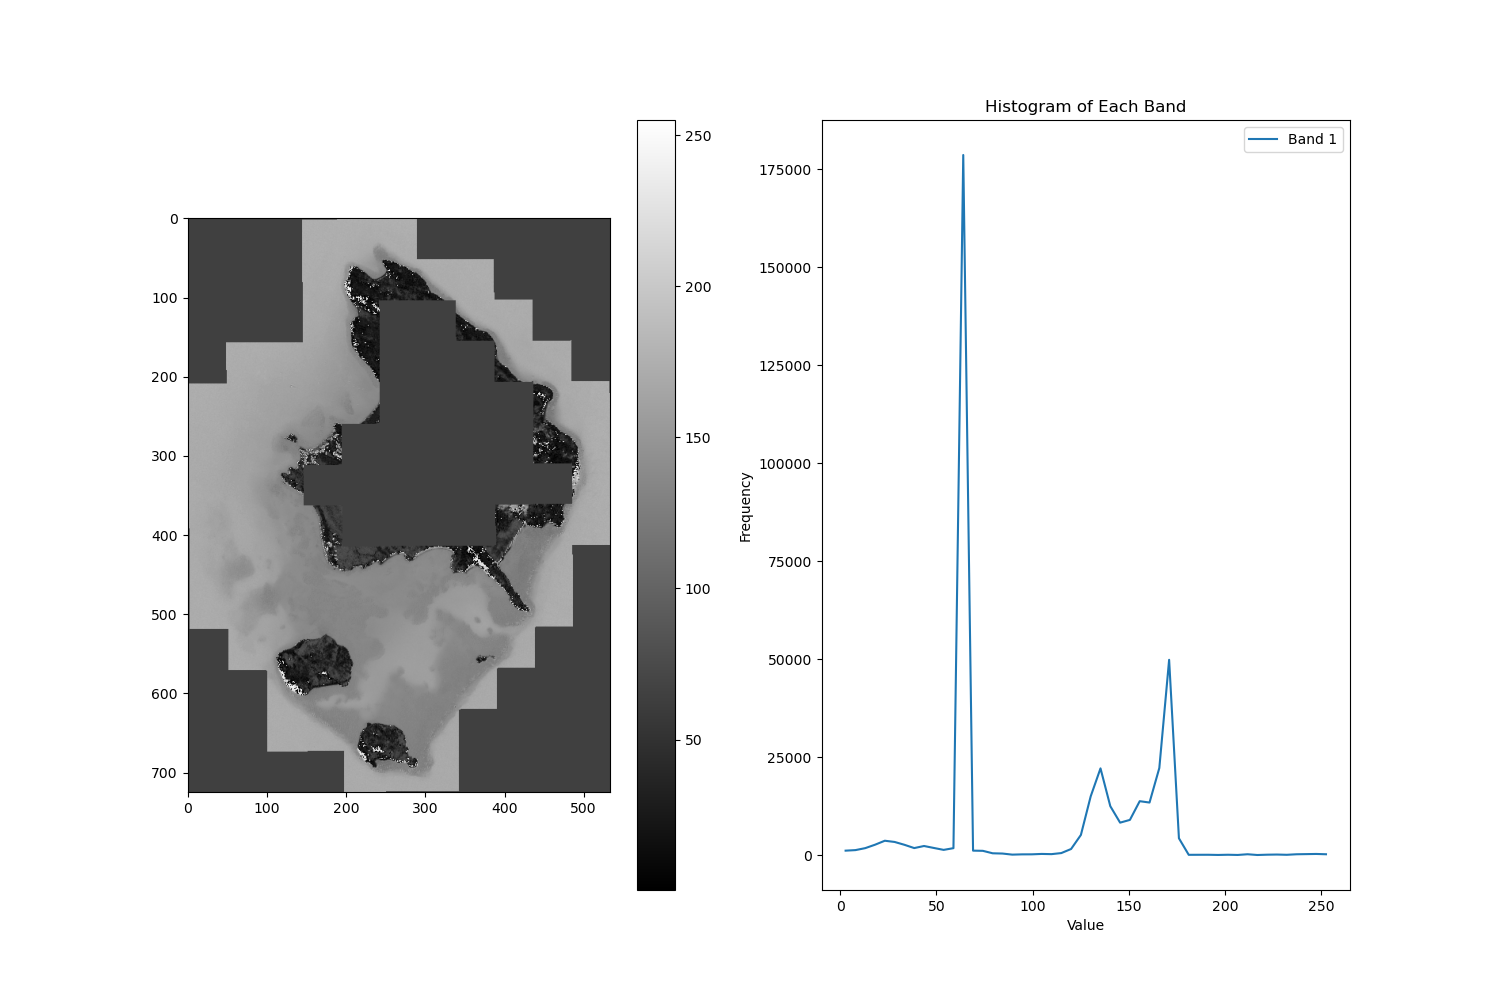

In [11]:
BandPlotter(Transform.linear_contrast_enhancement(Transform.rgb_to_hsi(ImageHelper.plot_rgb(tf_img))))
plt.show()

IntSlider(value=0, description='Band', max=2)

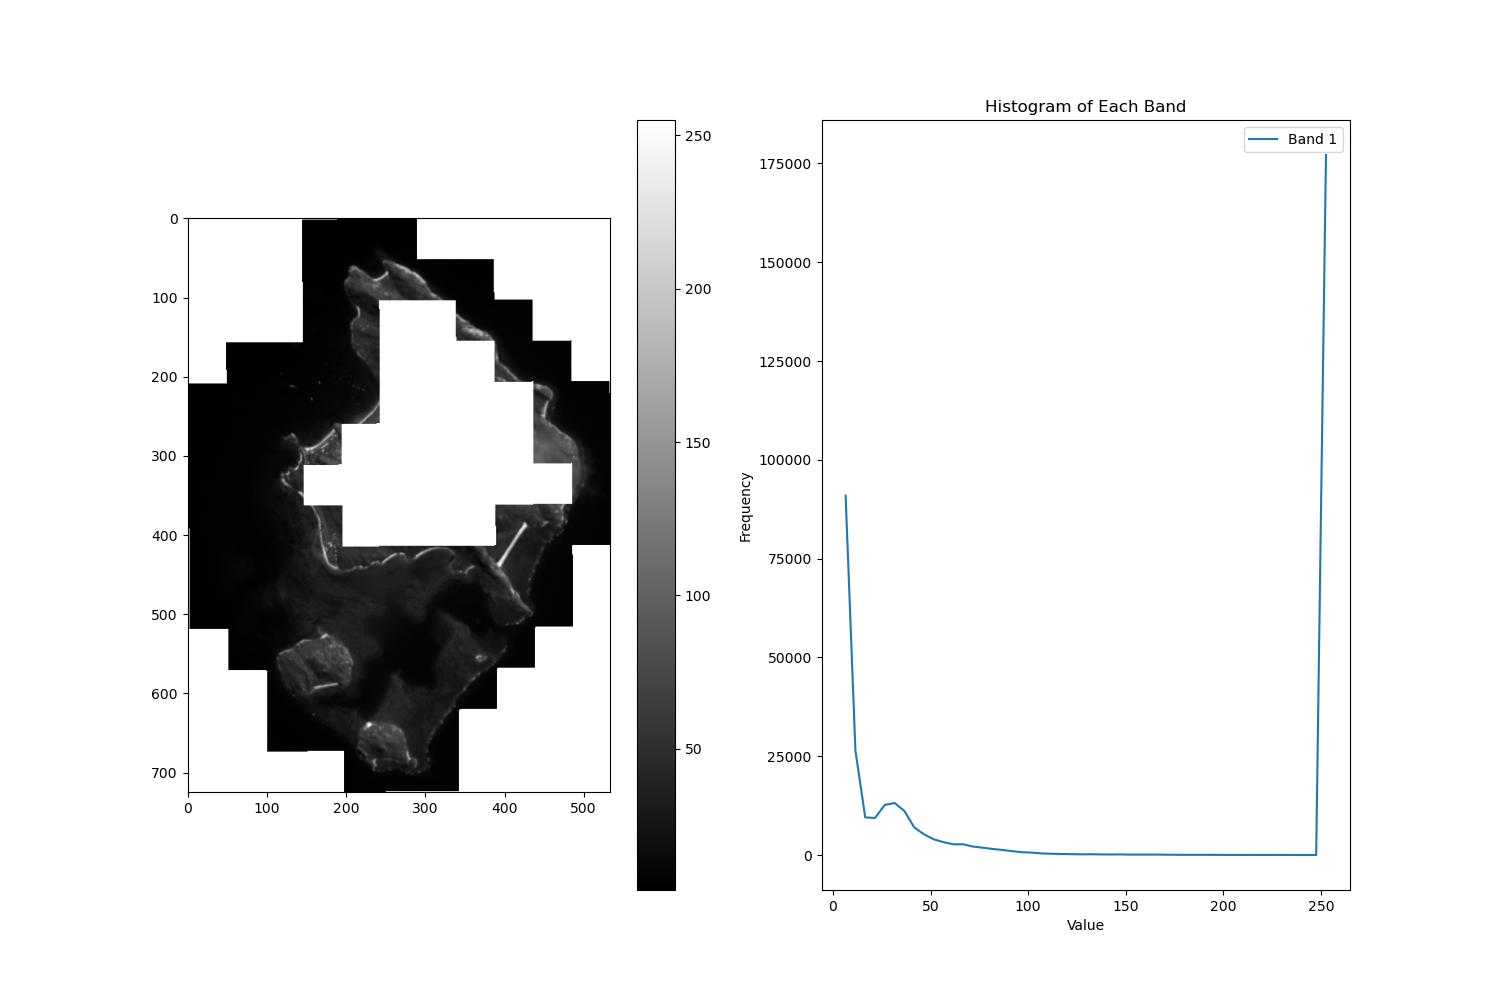

In [12]:
BandPlotter(output_array)
